## Using first two features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Saikat\1st python project from anaconda\Housepriceprediction.csv",index_col=0)

In [3]:
data

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,
1,8450,7,856,1710,8,2,548,208500
2,9600,6,1262,1262,6,2,460,181500
3,11250,7,920,1786,6,2,608,223500
4,9550,7,961,1717,7,3,642,140000
5,14260,8,1145,2198,9,3,836,250000
...,...,...,...,...,...,...,...,...
1456,7917,6,953,1647,7,2,460,175000
1457,13175,6,2073,2073,7,2,500,210000
1458,9042,7,1188,2340,9,1,252,266500


In [4]:
data.corr()

,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
LotArea,1.000000,0.105806,0.299475,0.263116,0.190015,0.154871,0.180403,0.263843
OverallQual,0.105806,1.000000,0.476224,0.593007,0.427452,0.600671,0.562022,0.790982
1stFlrSF,0.299475,0.476224,1.000000,0.566024,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.263116,0.593007,0.566024,1.000000,0.825489,0.467247,0.468997,0.708624
TotRmsAbvGrd,0.190015,0.427452,0.409516,0.825489,1.000000,0.362289,0.337822,0.533723
GarageCars,0.154871,0.600671,0.439317,0.467247,0.362289,1.000000,0.882475,0.640409
GarageArea,0.180403,0.562022,0.489782,0.468997,0.337822,0.882475,1.000000,0.623431
SalePrice,0.263843,0.790982,0.605852,0.708624,0.533723,0.640409,0.623431,1.000000


In [5]:
df=pd.DataFrame()
df['LotArea'],df['OverallQual'],df['SalePrice']=data['LotArea'],data['OverallQual'],data['SalePrice']

In [6]:
df

,LotArea,OverallQual,SalePrice
Id,,,
1,8450,7,208500
2,9600,6,181500
3,11250,7,223500
4,9550,7,140000
5,14260,8,250000
...,...,...,...
1456,7917,6,175000
1457,13175,6,210000
1458,9042,7,266500


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,[0,1]],df.iloc[:,[2]],train_size=1000)
print(x_train,type(x_train))
print(y_train,type(y_train))

      LotArea  OverallQual
Id                        
1166     9541            7
117     11616            5
1296     8400            5
601     10927            8
1134     9828            8
...       ...          ...
581     14585            6
777     11210            7
884      6204            4
199      5520            6
1435    17400            5

[1000 rows x 2 columns] <class 'pandas.core.frame.DataFrame'>
      SalePrice
Id             
1166     233170
117      139000
1296     138500
601      275000
1134     239500
...         ...
581      181900
777      221500
884      118500
199      104000
1435     160000

[1000 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


## Polynomial Regression of degree 2

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_2=PolynomialFeatures(2)
x_train_poly_2,x_test_poly_2=poly_2.fit_transform(x_train),poly_2.fit_transform(x_test)
print(x_train)
x_train_poly_2

      LotArea  OverallQual
Id                        
1166     9541            7
117     11616            5
1296     8400            5
601     10927            8
1134     9828            8
...       ...          ...
581     14585            6
777     11210            7
884      6204            4
199      5520            6
1435    17400            5

[1000 rows x 2 columns]


array([[1.00000000e+00, 9.54100000e+03, 7.00000000e+00, 9.10306810e+07,
        6.67870000e+04, 4.90000000e+01],
       [1.00000000e+00, 1.16160000e+04, 5.00000000e+00, 1.34931456e+08,
        5.80800000e+04, 2.50000000e+01],
       [1.00000000e+00, 8.40000000e+03, 5.00000000e+00, 7.05600000e+07,
        4.20000000e+04, 2.50000000e+01],
       ...,
       [1.00000000e+00, 6.20400000e+03, 4.00000000e+00, 3.84896160e+07,
        2.48160000e+04, 1.60000000e+01],
       [1.00000000e+00, 5.52000000e+03, 6.00000000e+00, 3.04704000e+07,
        3.31200000e+04, 3.60000000e+01],
       [1.00000000e+00, 1.74000000e+04, 5.00000000e+00, 3.02760000e+08,
        8.70000000e+04, 2.50000000e+01]])

In [9]:
from sklearn.linear_model import LinearRegression
reg_2=LinearRegression()
reg_2.fit(x_train_poly_2,y_train)
coef_2=reg_2.coef_
intercept_2=reg_2.intercept_

In [10]:
print(coef_2)
print(intercept_2)

[[ 0.00000000e+00  4.32350841e+00 -3.34453033e+04 -1.24023118e-05
  -1.81107846e-01  6.34559241e+03]]
[105151.29610119]


In [11]:
y_pred=reg_2.predict(x_test_poly_2)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7006000686979312

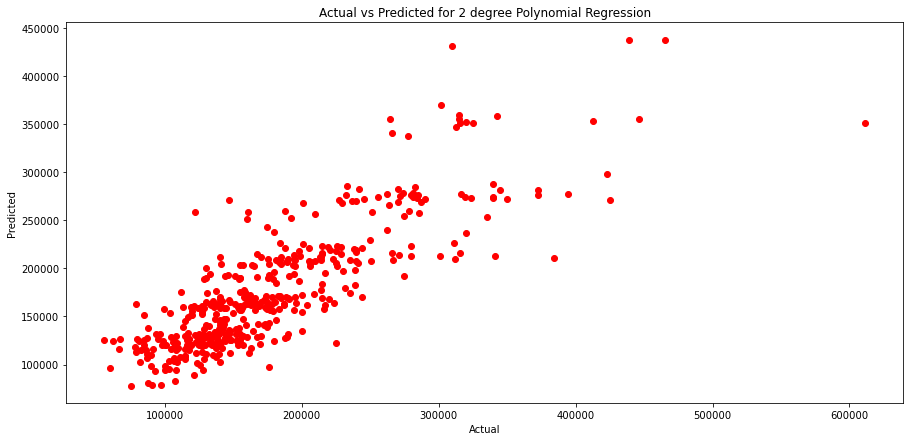

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(y_test,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for 2 degree Polynomial Regression')
plt.show()

## Polynomial regression of degree 3

In [14]:
poly_3=PolynomialFeatures(3)

In [15]:
x_train_poly_3,x_test_poly_3=poly_3.fit_transform(x_train),poly_3.fit_transform(x_test)
print(x_train_poly_3)

[[1.00000000e+00 9.54100000e+03 7.00000000e+00 ... 6.37214767e+08
  4.67509000e+05 3.43000000e+02]
 [1.00000000e+00 1.16160000e+04 5.00000000e+00 ... 6.74657280e+08
  2.90400000e+05 1.25000000e+02]
 [1.00000000e+00 8.40000000e+03 5.00000000e+00 ... 3.52800000e+08
  2.10000000e+05 1.25000000e+02]
 ...
 [1.00000000e+00 6.20400000e+03 4.00000000e+00 ... 1.53958464e+08
  9.92640000e+04 6.40000000e+01]
 [1.00000000e+00 5.52000000e+03 6.00000000e+00 ... 1.82822400e+08
  1.98720000e+05 2.16000000e+02]
 [1.00000000e+00 1.74000000e+04 5.00000000e+00 ... 1.51380000e+09
  4.35000000e+05 1.25000000e+02]]


In [16]:
reg_3=LinearRegression()
reg_3.fit(x_train_poly_3,y_train)
coef_3=reg_3.coef_
intercept_3=reg_3.intercept_

In [17]:
print(coef_3,intercept_3)

[[ 0.00000000e+00 -1.37567233e+01 -9.02154315e+02 -3.11027004e-05
   5.93116576e+00 -5.58858413e+03  3.09994613e-10 -9.43827729e-06
  -4.11462314e-01  8.82302637e+02]] [120081.91494363]


In [18]:
y_pred_3=reg_3.predict(x_test_poly_3)

In [19]:
r2_score(y_test,y_pred_3)

0.7113610573481841

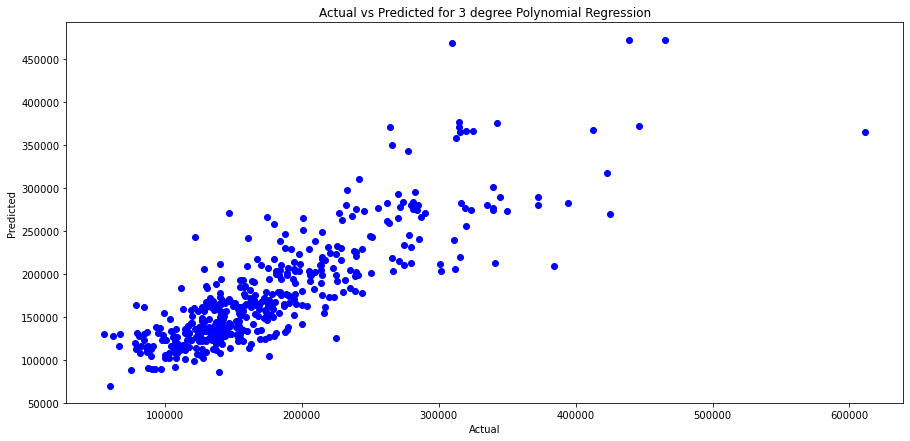

In [20]:
plt.figure(figsize=(15,7))
plt.scatter(y_test,y_pred_3,color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for 3 degree Polynomial Regression')
plt.show()